<a href="https://colab.research.google.com/github/Nagaraj17/DataScience/blob/master/NN_MNISTDataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
print (tf.__version__)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or 

1.12.0


In [0]:
#!pip install tensorflow==1.12.0  ## This is required for downgrading the tensorflow for the turorial purpose.

In [3]:
print (tf.__version__)
from tensorflow.examples.tutorials.mnist import input_data

1.12.0


In [4]:
mnist = input_data.read_data_sets("MNIST_data",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


## Outlining the model

In [0]:
#There are 28*28 = 784 inputs
# We will be working with two layers
#Output is 0 t0 9 = 10

input_size= 784
output_size=10
hidden_layer_size=100 # Hidden layers with same size

tf.reset_default_graph() #Clears the memory of all the variables 
# from the previous runs (reset the computational graph)

## Declaring the placeholders

In [0]:
inputs = tf.placeholder(tf.float32,[None,input_size])
targets = tf.placeholder(tf.float32,[None,output_size])

## Decalring variables

We need the  3 weights and 3 biases as we have 2 hidden layers.

The first weight size will be equal to size of input * size of the hidden layer(first hidden layer).
 

In [0]:
#============================================================
#First hidden layer
weights_1=tf.get_variable("weights_1",[input_size,hidden_layer_size])


biases_1 = tf.get_variable("biases_1",[hidden_layer_size])

##Activation function or applying non-linearity.
#currently we are applying the relu activation function
outputs_1 = tf.nn.relu(tf.matmul(inputs,weights_1)+biases_1)

#Other types of activation function are 
# tf.nn.sigmoid,tf.nn.tanh,tf.nn.relu,td.nn.softmax
#.nn stands for neural network module


In [0]:


#Second hidden layer

weights_2 = tf.get_variable("weights_2",[hidden_layer_size,hidden_layer_size])
biases_2 = tf.get_variable("biases_2",[hidden_layer_size])

outputs_2 = tf.nn.relu(tf.matmul(outputs_1,weights_2)+biases_2)


In [0]:
# Thrid hidden layer

weights_3 = tf.get_variable("weights_3",[hidden_layer_size,output_size])
biases_3 = tf.get_variable("biases_3",[output_size])

outputs_3 = tf.matmul(outputs_2,weights_3)+biases_3 # <- logitis 

##Incorporate the activation function in the last.




# tf.nn.softmax_cross_entropy_with_logits() is a function that
# applies a softmax activationand calculates a cross-entropy loss

logists here mean: unscaled probabilities 

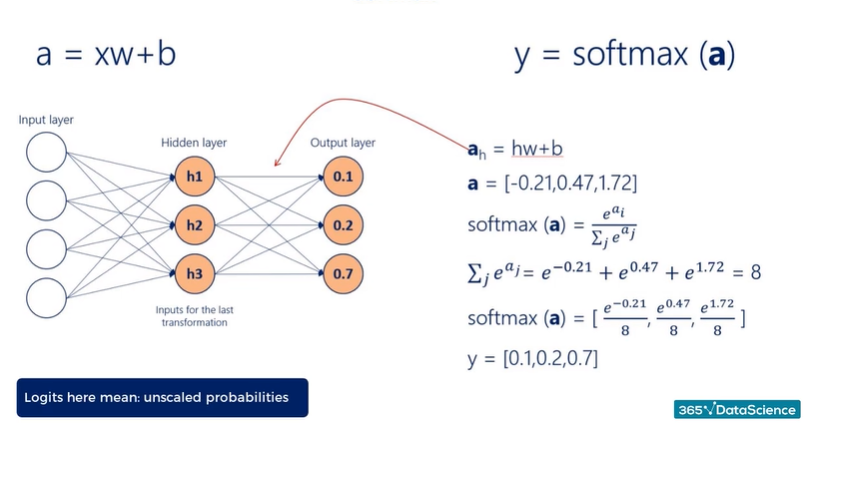



The ah is unscaled and the output produced by softmax is a probabilities



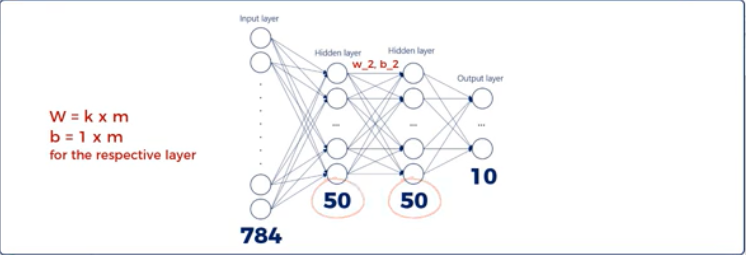



In [10]:
loss = tf.nn.softmax_cross_entropy_with_logits(logits=outputs_3,labels=targets)

#Find the mean loss to enhance the performance considerably

mean_loss = tf.reduce_mean(loss)#to find the mean of the tensor


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



# Optimization 
We can use gradient descent as shown below

optimize = tf.train.GradientDescentOptimizer(learning_rate=0.0.5).minimize(mean_loss)

But instead of GradientDescentOptimizer we will use ADAM which is coupled with batching.



In [0]:
optimize = tf.train.AdamOptimizer(learning_rate=0.001).minimize(mean_loss)

## Prediction accuracy

In what percentage of the cases did the algorith assign the highest probability to the output that matched the target.

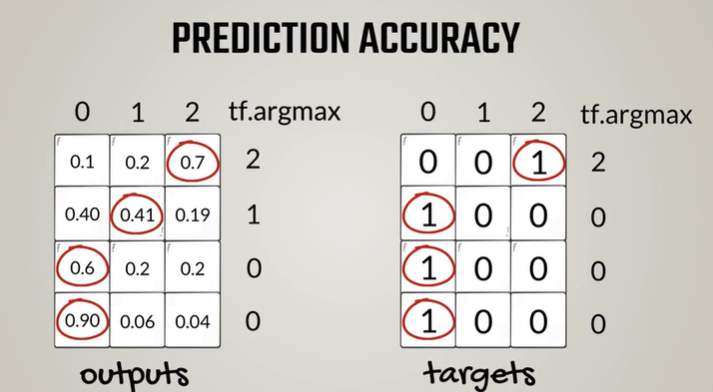

# Test

In [0]:
#tf.equal() is a method checks if two values are equal . In the case of tensors it does so element-wise


out_equal_target = tf.equal(tf.argmax(outputs_3,1),tf.argmax(targets,1)) 
#1 is the axis indication the columns (0 is for rows.)

accuracy = tf.reduce_mean(tf.cast(out_equal_target,tf.float32))


### Running the session

In [0]:
sess = tf.InteractiveSession()
initializer = tf.global_variables_initializer()

sess.run(initializer)

In [0]:
batch_size =100  # = 1 -> SGD

# Number of batches = number of samples /Batch size
#batch_size=#samples  -> GD

batch_number = mnist.train._num_examples//batch_size

max_epochs = 15

#Stoping we need a pre_validation_loss

prev_validation_loss = 9999999.
# this is so large so that we don't disturb the first epoch




In [15]:
for epoch_counter in range(max_epochs):
  curr_epoch_loss =0.
  for batch_counter in range(batch_number):
    input_batch,target_batch = mnist.train.next_batch(batch_size)
    _,batch_loss = sess.run([optimize,mean_loss],feed_dict={inputs:input_batch,targets:target_batch})
    curr_epoch_loss+=batch_loss
  curr_epoch_loss/=batch_number # Gives us the mean loss
  input_batch,target_batch=mnist.validation.next_batch(mnist.validation.num_examples)
  validation_loss,validation_accuracy=sess.run([mean_loss,accuracy],feed_dict={inputs:input_batch,targets:target_batch})
  print ('Epoch' + str(epoch_counter+1)+
         '. Training loss: '+'{0:.3f}'.format(curr_epoch_loss)+
         '. validation loss: '+'{0:.3f}'.format(validation_loss)+
         '. validation acuracy: '+ '{0:.2f}'.format(validation_accuracy * 100)+'%')
  if validation_loss>prev_validation_loss:
    break
    
  prev_validation_loss=validation_loss
print('End of training!..')
  

Epoch1. Training loss: 0.335. validation loss: 0.147. validation acuracy: 95.56%
Epoch2. Training loss: 0.137. validation loss: 0.112. validation acuracy: 96.70%
Epoch3. Training loss: 0.095. validation loss: 0.091. validation acuracy: 97.24%
Epoch4. Training loss: 0.072. validation loss: 0.081. validation acuracy: 97.70%
Epoch5. Training loss: 0.056. validation loss: 0.077. validation acuracy: 97.72%
Epoch6. Training loss: 0.046. validation loss: 0.078. validation acuracy: 97.70%
End of training!..


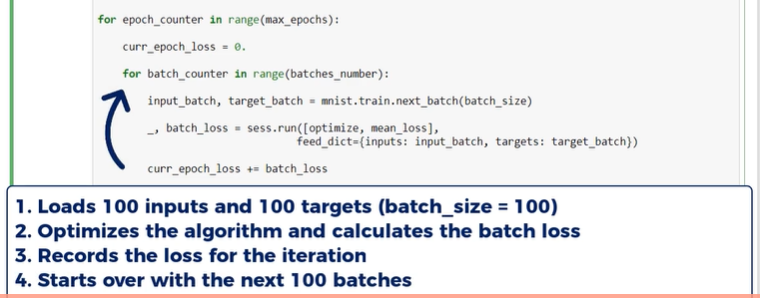

Validation is done by forward propogating without optimization.

# Test

In [16]:
input_batch,target_batch = mnist.test.next_batch(mnist.test.num_examples)
test_accuracy = sess.run([accuracy],feed_dict={inputs:input_batch,targets:target_batch})
test_accuracy_percent = test_accuracy[0]*100.
print('Test accuracy :'+ '{0:.2f}'.format(test_accuracy_percent)+'%')#This the final accuracy of the model.


Test accuracy :97.56%
